<a href="https://colab.research.google.com/github/Mahfuz12309/bitcoinPricePrediction/blob/main/bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
btc = btc_ticker.history(period="max")

In [4]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-11 00:00:00+00:00,69020.546875,72850.710938,67194.882812,72123.906250,65716656765,0.0,0.0
2024-03-12 00:00:00+00:00,72125.125000,72825.656250,68728.851562,71481.289062,62554434520,0.0,0.0
2024-03-13 00:00:00+00:00,71482.117188,73637.476562,71334.093750,73083.500000,48212536929,0.0,0.0


In [5]:
btc.index = pd.to_datetime(btc.index)

In [6]:
del btc["Dividends"]
del btc["Stock Splits"]

In [7]:
btc.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3468 entries, 2014-09-17 00:00:00+00:00 to 2024-03-15 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3468 non-null   float64
 1   High    3468 non-null   float64
 2   Low     3468 non-null   float64
 3   Close   3468 non-null   float64
 4   Volume  3468 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 162.6 KB


In [8]:
btc.colums = [c.lower() for c in btc.columns]

<ipython-input-8-3c0883d27c71>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  btc.colums = [c.lower() for c in btc.columns]


<Axes: xlabel='Date'>

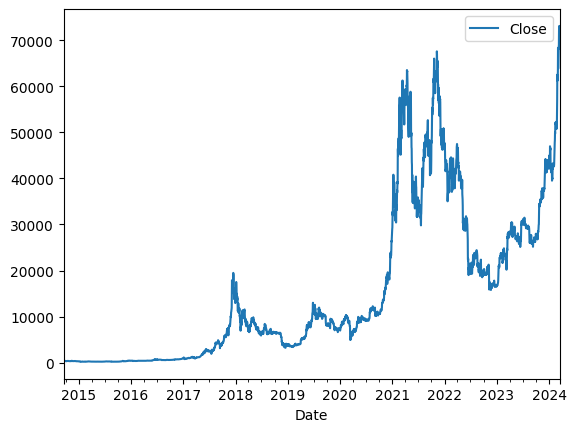

In [9]:
btc.plot.line(y="Close",use_index=True)

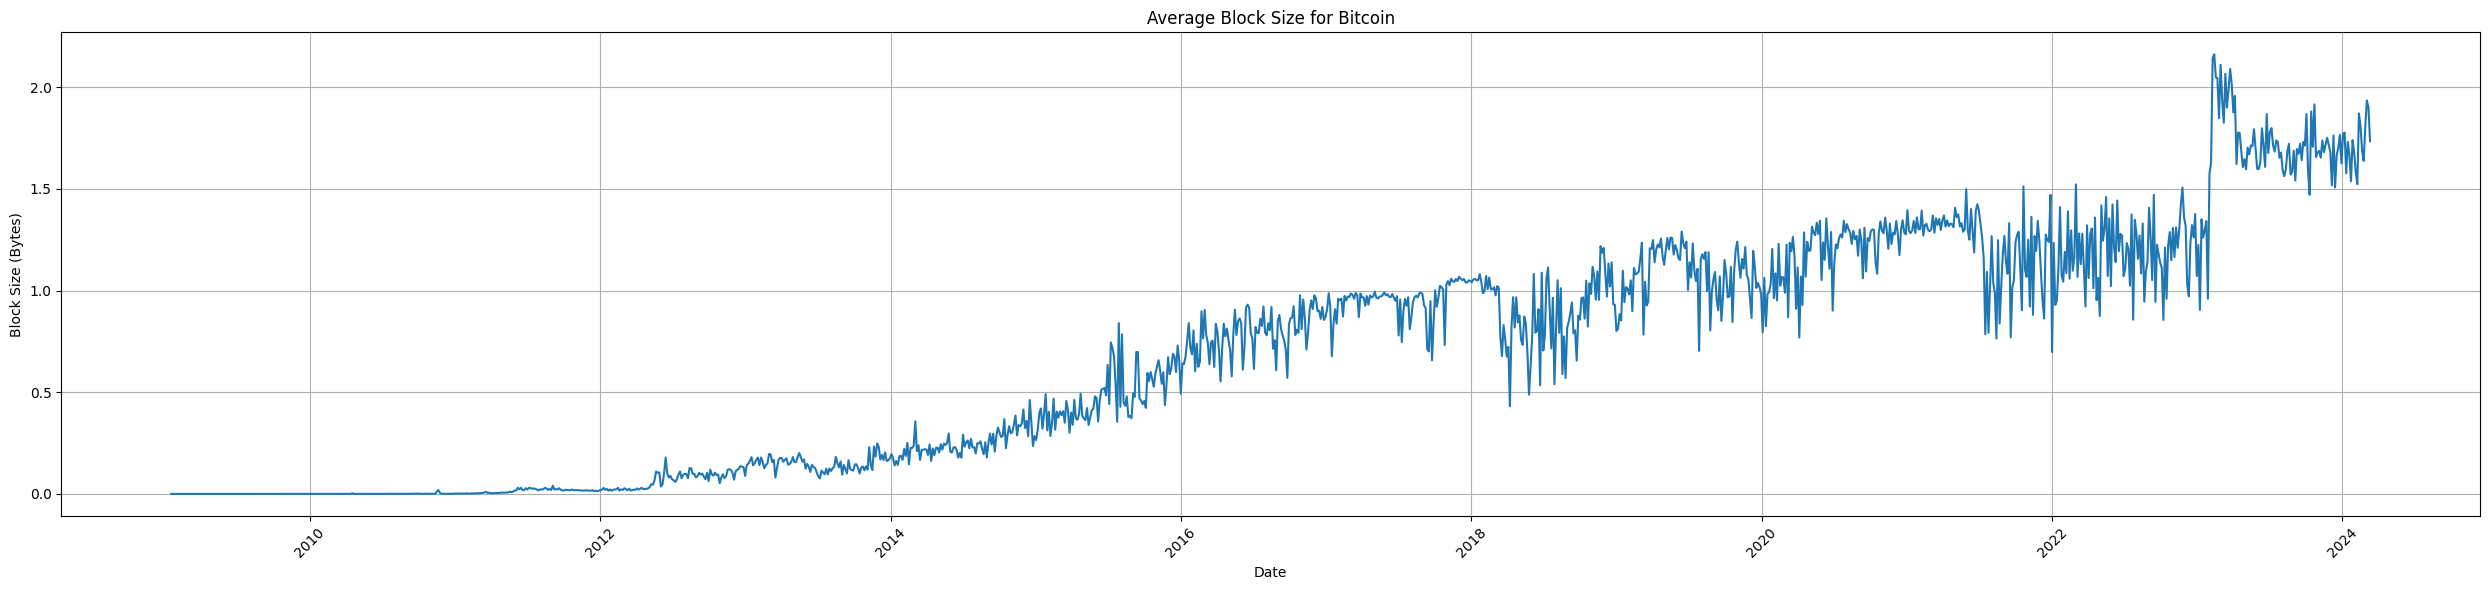

In [33]:


# Query blockchain.com API for block size data for Bitcoin
url = 'https://api.blockchain.info/charts/avg-block-size?timespan=all&format=json'
response = requests.get(url)
data = response.json()

# Extract block size data
block_data = data.get('values', [])

# If block size data is empty, inform the user and exit
if not block_data:
    print("No block size data available.")
    exit()

# Extract timestamps and block sizes
timestamps = [pd.to_datetime(entry['x'], unit='s') for entry in block_data]
block_sizes = [entry['y'] for entry in block_data]

# Create DataFrame
df = pd.DataFrame({'Timestamp': timestamps, 'Block Size': block_sizes})

# Plot the data
plt.figure(figsize=(25, 6))
plt.plot(df['Timestamp'], df['Block Size'], linestyle='-')
plt.title('Average Block Size for Bitcoin')
plt.xlabel('Date')
plt.ylabel('Block Size (Bytes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

# Assuming df is your DataFrame with block size data

# Create a new DataFrame with the date column and block size data column
new_table = pd.DataFrame({'Date': df['Timestamp'], 'Block Size': df['Block Size']})

# Save new_table to a new CSV file
new_table.to_csv('block_size_data.csv', index=False)




In [12]:
import pandas as pd

# Read the CSV file into a DataFrame
new_table = pd.read_csv('block_size_data.csv')

# Display the DataFrame
print(new_table)


            Date  Block Size
0     2009-01-17    0.000216
1     2009-01-21    0.000230
2     2009-01-25    0.000217
3     2009-01-29    0.000227
4     2009-02-02    0.000217
...          ...         ...
1379  2024-02-24    1.637704
1380  2024-02-28    1.806319
1381  2024-03-03    1.934864
1382  2024-03-07    1.900112
1383  2024-03-11    1.734872

[1384 rows x 2 columns]


In [15]:
new_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1384 non-null   object 
 1   Block Size  1384 non-null   float64
dtypes: float64(1), object(1)
memory usage: 21.8+ KB


In [13]:
import requests
import pandas as pd

# Query blockchain.com API for confirmed transactions data for Bitcoin
url = 'https://api.blockchain.info/charts/n-transactions?timespan=all&format=json'
response = requests.get(url)
data = response.json()

# Extract confirmed transactions data
transactions_data = data.get('values', [])

# If confirmed transactions data is empty, inform the user and exit
if not transactions_data:
    print("No confirmed transactions data available.")
    exit()

# Extract timestamps and confirmed transactions
timestamps = [pd.to_datetime(entry['x'], unit='s') for entry in transactions_data]
transactions = [entry['y'] for entry in transactions_data]

# Create DataFrame
transactions_df = pd.DataFrame({'Date': timestamps, 'Confirmed Transactions': transactions})

# Set Date as index
transactions_df.set_index('Date', inplace=True)

# Display the confirmed transactions data as a table
print(transactions_df)


            Confirmed Transactions
Date                              
2009-01-17                   109.0
2009-01-21                   105.0
2009-01-25                   192.0
2009-01-29                   122.0
2009-02-02                   129.0
...                            ...
2024-02-24                340419.0
2024-02-28                413800.0
2024-03-03                385447.0
2024-03-07                436344.0
2024-03-11                394098.0

[1384 rows x 1 columns]


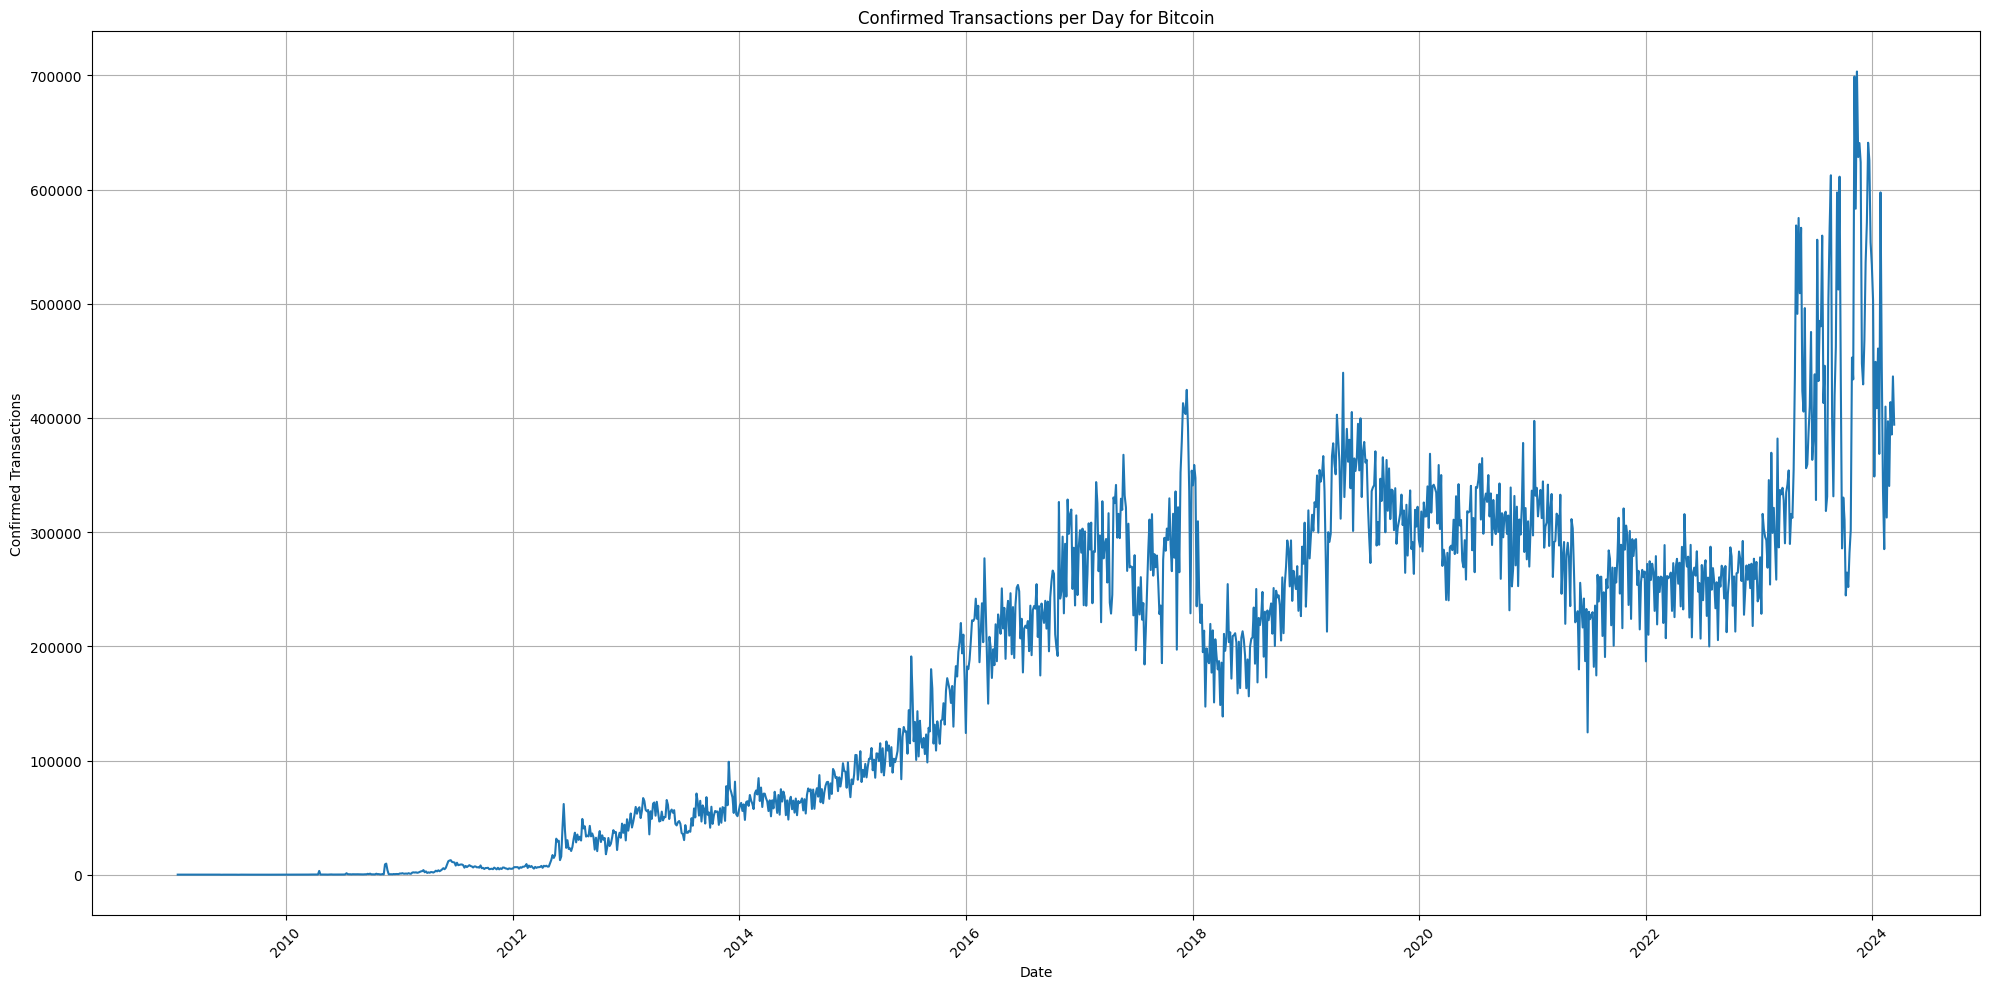

In [20]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Query blockchain.com API for confirmed transactions data for Bitcoin
url = 'https://api.blockchain.info/charts/n-transactions?timespan=all&format=json'
response = requests.get(url)
data = response.json()

# Extract confirmed transactions data
transactions_data = data.get('values', [])

# If confirmed transactions data is empty, inform the user and exit
if not transactions_data:
    print("No confirmed transactions data available.")
    exit()

# Extract timestamps and confirmed transactions
timestamps = [pd.to_datetime(entry['x'], unit='s') for entry in transactions_data]
transactions = [entry['y'] for entry in transactions_data]

# Create DataFrame
transactions_df = pd.DataFrame({'Date': timestamps, 'Confirmed Transactions': transactions})

# Set Date as index
transactions_df.set_index('Date', inplace=True)

# Plot the confirmed transactions data
plt.figure(figsize=(20, 10))
plt.plot(transactions_df.index, transactions_df['Confirmed Transactions'],linestyle='-')
plt.title('Confirmed Transactions per Day for Bitcoin')
plt.xlabel('Date')
plt.ylabel('Confirmed Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
import requests
import pandas as pd

# Query blockchain.com API for average block size data for Bitcoin
block_size_url = 'https://api.blockchain.info/charts/avg-block-size?timespan=all&format=json'
block_size_response = requests.get(block_size_url)
block_size_data = block_size_response.json()

# Extract block size data
block_size_values = block_size_data.get('values', [])
block_size_timestamps = [pd.to_datetime(entry['x'], unit='s') for entry in block_size_values]
block_sizes = [entry['y'] for entry in block_size_values]

# Create DataFrame for block size data
block_size_df = pd.DataFrame({'Date': block_size_timestamps, 'Average Block Size (Bytes)': block_sizes})
block_size_df.set_index('Date', inplace=True)

# Query blockchain.com API for confirmed transactions data for Bitcoin
transactions_url = 'https://api.blockchain.info/charts/n-transactions?timespan=all&format=json'
transactions_response = requests.get(transactions_url)
transactions_data = transactions_response.json()

# Extract confirmed transactions data
transactions_values = transactions_data.get('values', [])
transactions_timestamps = [pd.to_datetime(entry['x'], unit='s') for entry in transactions_values]
transactions = [entry['y'] for entry in transactions_values]

# Create DataFrame for confirmed transactions data
transactions_df = pd.DataFrame({'Date': transactions_timestamps, 'Confirmed Transactions': transactions})
transactions_df.set_index('Date', inplace=True)

# Concatenate the two DataFrames
btc_data = pd.concat([block_size_df, transactions_df], axis=1)

# Display the concatenated DataFrame
print(btc_data)


            Average Block Size (Bytes)  Confirmed Transactions
Date                                                          
2009-01-17                    0.000216                   109.0
2009-01-21                    0.000230                   105.0
2009-01-25                    0.000217                   192.0
2009-01-29                    0.000227                   122.0
2009-02-02                    0.000217                   129.0
...                                ...                     ...
2024-02-24                    1.637704                340419.0
2024-02-28                    1.806319                413800.0
2024-03-03                    1.934864                385447.0
2024-03-07                    1.900112                436344.0
2024-03-11                    1.734872                394098.0

[1384 rows x 2 columns]


In [28]:
import requests
import pandas as pd

# Define the start and end dates for data collection
start_date = '2009-01-01'
end_date = '2024-01-01'

# Query blockchain.com API for Bitcoin transaction data
url = f'https://api.blockchain.info/charts/n-transactions?timespan=all&start={start_date}&end={end_date}&format=json'
response = requests.get(url)
data = response.json()

# Extract transaction data
transactions_data = data.get('values', [])

# If transaction data is empty, inform the user and exit
if not transactions_data:
    print("No transaction data available.")
    exit()

# Extract timestamps and transactions
timestamps = [pd.to_datetime(entry['x'], unit='s') for entry in transactions_data]
transactions = [entry['y'] for entry in transactions_data]

# Create DataFrame
btc_transactions_df = pd.DataFrame({'Date': timestamps, 'Total Transactions': transactions})
btc_transactions_df.set_index('Date', inplace=True)

# Reindex the DataFrame to fill missing dates
idx = pd.date_range(start=start_date, end=end_date, freq='D')
btc_transactions_df = btc_transactions_df.reindex(idx)

# Fill missing transaction values with the average of the previous and next day's values
btc_transactions_df['Total Transactions'] = btc_transactions_df['Total Transactions'].fillna(method='ffill')
btc_transactions_df['Total Transactions'] = btc_transactions_df['Total Transactions'].fillna(method='bfill')

# Compute the mean of previous and next day's values
previous_values = btc_transactions_df['Total Transactions'].shift(1)
next_values = btc_transactions_df['Total Transactions'].shift(-1)
mean_values = (previous_values + next_values) / 2

# Fill missing values with the computed mean values
btc_transactions_df['Total Transactions'].fillna(mean_values, inplace=True)

# Display the DataFrame
print(btc_transactions_df)


            Total Transactions
2009-01-01               109.0
2009-01-02               109.0
2009-01-03               109.0
2009-01-04               109.0
2009-01-05               109.0
...                        ...
2023-12-28            553693.0
2023-12-29            553693.0
2023-12-30            533823.0
2023-12-31            533823.0
2024-01-01            533823.0

[5479 rows x 1 columns]
